In [181]:
import sqlite3

class Person:
    def __init__(self, name, age, lvl, gender):
        self.name = name
        self.age = age
        self.lvl = lvl
        self.gender = gender
    
    def __str__(self):
        return f"{self.name}, {self.age} years old, {self.lvl}, {self.gender}"
    

Text(0.5, 1.0, 'Распределение Уровней среди 51239 магов')

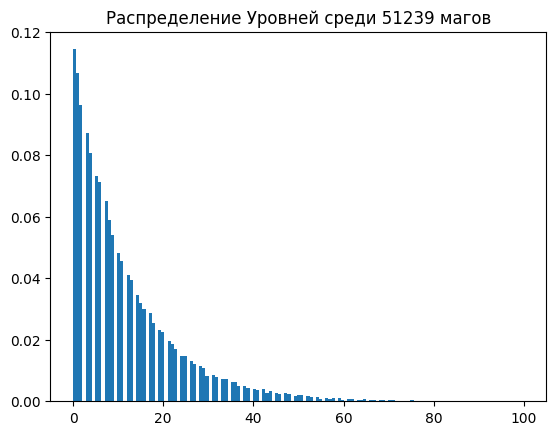

In [182]:
def sequence(mas): # Выводит последний элемент списка, находящийся внутри последовательности натуральных чисел, состоящих из уникальных чисел
       mas=list(set(mas))
       mas.sort()
       for i in range(len(mas)):
              if i!=mas[i]:
                     return mas[i-1]
       return i

import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

global lvls
checker=-1
# size_rand=10000
size_rand=40000
while checker<100:
       r = expon.rvs(size=size_rand)*12
       lvls=list(map(int,r))
       checker=sequence(lvls)
       size_rand+=250
       # print('------')
       # print(max(lvls))

def minus100(x):
       if x<=100:
              return True
       else:
              return False
lvls=[i for i in filter(minus100, lvls)]

fig, ax = plt.subplots(1, 1)
ax.hist(lvls, density=True, bins='auto')
plt.title(f'Распределение Уровней среди {len(lvls)} магов')

In [183]:
def find_n(x,n=2):
    if x>=10*(n-1) and x<10*n:
        return True
    else:
        return False
for q in range(1,11):
    seqs=[i for i in filter(lambda seq: find_n(seq,n=q), lvls)] #lambda нужна чтобы вставить в вызывающуюся фукнцию дополнительную переменную (обычно filter не позволяет это сделать)
    print(f"heroes in range from {10*(q-1)} to {10*(q)}: {len(seqs)}")

heroes in range from 0 to 10: 28969
heroes in range from 10 to 20: 12497
heroes in range from 20 to 30: 5544
heroes in range from 30 to 40: 2376
heroes in range from 40 to 50: 1071
heroes in range from 50 to 60: 467
heroes in range from 60 to 70: 190
heroes in range from 70 to 80: 79
heroes in range from 80 to 90: 30
heroes in range from 90 to 100: 15


In [184]:
def GeneratorPersons(nums=1,stage=-1):
    import random
    from pynames import GENDER, LANGUAGE
    from pynames.generators.elven import DnDNamesGenerator
    elven_generator = DnDNamesGenerator()   
    genders=['Male','Female']
    ages=[i for i in range(15,40)]
    data=[]
    for c in range(nums):
        #GENDER
        gender=random.choice(genders)
        #NAME
        if gender=='Male':
            name=elven_generator.get_name_simple(GENDER.MALE)
        else:
            name=elven_generator.get_name_simple(GENDER.FEMALE)
        #LVL
        lvl=random.choice(lvls)

        #AGE
        age=random.choice(ages)

        # Считывание данных и создание объекта Person
        person=[name,age,lvl,gender]
        data.append(person)
        
    return data

In [185]:

data=[]


In [186]:

data.append(GeneratorPersons(nums=1000))

In [187]:
data=data[0]
# print(data)

[['Caelhelith', 22, 6, 'Female'], ["iss'Ilshelas", 39, 57, 'Male'], ['Aelranlith', 23, 24, 'Male'], ['Tylan', 31, 1, 'Male'], ['Thoimon', 32, 22, 'Male'], ['Saetaenyn', 28, 0, 'Female'], ['Malothiihel', 21, 48, 'Female'], ['Throibrar', 27, 0, 'Female'], ['Huerlabrar', 20, 7, 'Male'], ['Lafibrar', 36, 20, 'Female'], ['Tyihalavel', 36, 20, 'Female'], ['Caeldre', 21, 5, 'Male'], ['Maraari', 22, 8, 'Male'], ['Cyashk', 26, 7, 'Female'], ['Lamernlith', 21, 12, 'Male'], ['Ruri', 32, 22, 'Female'], ['Hainal', 31, 0, 'Female'], ['Uthruilila', 32, 7, 'Female'], ['Keththir', 31, 18, 'Female'], ['Baellath', 27, 27, 'Female'], ['Eirre', 20, 3, 'Female'], ['Sehik', 24, 9, 'Female'], ['Daedethavara', 38, 27, 'Female'], ['Arntaeethar', 20, 0, 'Female'], ['Pyeruil', 35, 2, 'Female'], ['Erthir', 22, 2, 'Female'], ['Sheer', 34, 12, 'Male'], ['Ruaaroro', 23, 20, 'Female'], ['Saeira', 24, 1, 'Female'], ['Nuelis', 24, 1, 'Female'], ["atril'Lafonerl", 24, 34, 'Male'], ['Cyrah', 39, 11, 'Male'], ['Traadariann

In [188]:
import pandas as pd
df=pd.DataFrame(data,columns=['Name','Age','Lvl','Gender'])

In [189]:
df.head(80)

,Name,Age,Lvl,Gender
0,Caelhelith,22,6,Female
1,iss'Ilshelas,39,57,Male
2,Aelranlith,23,24,Male
3,Tylan,31,1,Male
4,Thoimon,32,22,Male
...,...,...,...,...
75,Laatria,19,10,Female
76,Vererlri,30,1,Female
77,Rumiantril,16,4,Male
78,Ridruil,15,6,Female


In [190]:
df[df.Lvl>50]

,Name,Age,Lvl,Gender
1,iss'Ilshelas,39,57,Male
136,Kethaelash,19,74,Male
315,Malsparreth,35,67,Male
405,Seler,23,53,Female
566,Tiaquelean,21,57,Male
570,Daelithen,37,62,Female
642,ther'Lyhelath,24,52,Male
682,Mararah,37,62,Male
766,Arather,18,61,Female
926,asel'Ridaroath,32,53,Female
